In [52]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns


In [53]:
df=pd.read_csv('Stock market.csv')
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,07-02-2023,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,08-02-2023,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,09-02-2023,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,10-02-2023,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,13-02-2023,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,01-05-2023,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,02-05-2023,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,03-05-2023,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,04-05-2023,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [55]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177506,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [56]:
df.dtypes

Ticker        object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [57]:
df.isnull().any()

Ticker       False
Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

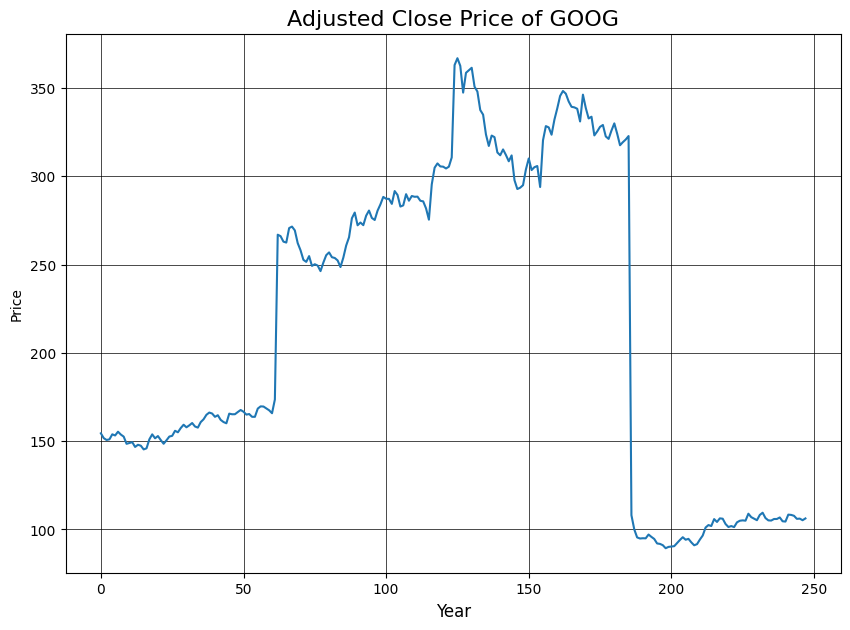

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
df['Adj Close'].plot(figsize=(10, 7))
# Define the label for the title of the figure

plt.title("Adjusted Close Price of GOOG",fontsize=16)
plt.ylabel('Price', fontsize=10)
plt.xlabel('Year', fontsize=12)
plt.grid(which="Major",color='k',linestyle='-',linewidth=0.5)
plt.show()

        count        mean        std         min         25%         50%  \
Ticker                                                                     
AAPL     62.0  158.240645   7.360485  145.309998  152.077499  158.055000   
GOOG     62.0  100.631532   6.279464   89.349998   94.702501  102.759998   
MSFT     62.0  275.039839  17.676231  246.270004  258.742500  275.810013   
NFLX     62.0  327.614677  18.554419  292.760010  315.672493  325.600006   

               75%         max  
Ticker                          
AAPL    165.162506  173.570007  
GOOG    105.962503  109.459999  
MSFT    287.217506  310.649994  
NFLX    338.899994  366.829987  


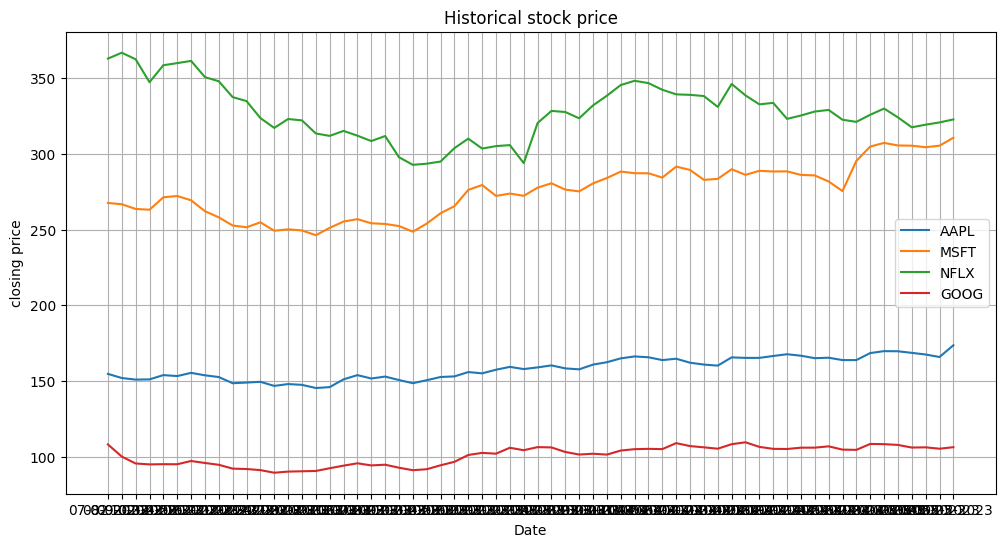

In [59]:
summary_statistics=df.groupby('Ticker')['Close'].describe()
print(summary_statistics)
plt.figure(figsize=(12, 6))
for ticker in df['Ticker'].unique():
    data=df[df['Ticker']==ticker]
    plt.plot(data['Date'],data['Close'],label=ticker)

plt.title('Historical stock price')
plt.xlabel('Date')

plt.ylabel('closing price')
plt.legend()
plt.grid()
plt.show()

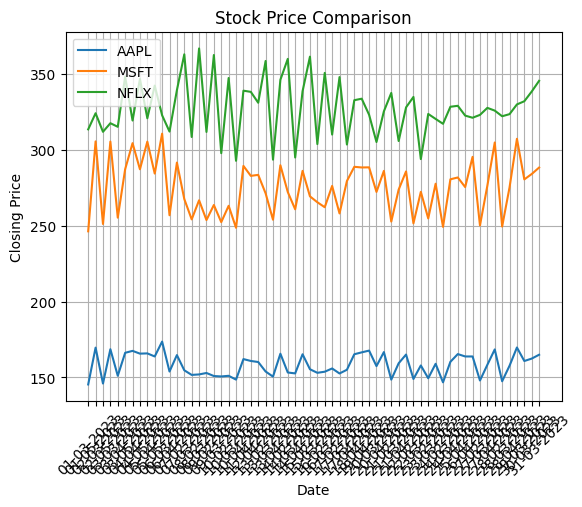

Correlation Matrix:
Ticker      AAPL      MSFT      NFLX
Ticker                              
AAPL    1.000000  0.953037  0.154418
MSFT    0.953037  1.000000  0.191273
NFLX    0.154418  0.191273  1.000000


In [60]:
df
selected_tickers=['AAPL','MSFT','NFLX']
filtered_df = df[df['Ticker'].isin(selected_tickers)]
pivot_df = filtered_df.pivot(index='Date', columns='Ticker', values='Close')
correlation_matrix = pivot_df.corr()
for ticker in selected_tickers:
    plt.plot(pivot_df.index, pivot_df[ticker], label=ticker)
plt.title('Stock Price Comparison')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()
print("Correlation Matrix:")
print(correlation_matrix)



In [61]:

average_volume_by_company = filtered_df.groupby('Ticker')['Volume'].mean()
std_dev = filtered_df.groupby('Ticker')['Volume'].std()
threshold_factor = 2
high_vol_threshold = average_volume_by_company + (threshold_factor * std_dev)
low_vol_threshold = average_volume_by_company - (threshold_factor * std_dev)
filtered_df['HighVolume'] = filtered_df.apply(
    lambda row: row['Volume'] > high_vol_threshold[row['Ticker']], axis=1
)
filtered_df['LowVolume'] = filtered_df.apply(
    lambda row: row['Volume'] < low_vol_threshold[row['Ticker']], axis=1
)
filtered_df




C:\Users\suraj\AppData\Local\Temp\ipykernel_17960\160338846.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['HighVolume'] = filtered_df.apply(
C:\Users\suraj\AppData\Local\Temp\ipykernel_17960\160338846.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['LowVolume'] = filtered_df.apply(


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,HighVolume,LowVolume
0,AAPL,07-02-2023,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,False,False
1,AAPL,08-02-2023,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,False,False
2,AAPL,09-02-2023,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,False,False
3,AAPL,10-02-2023,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,False,False
4,AAPL,13-02-2023,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,False,False
...,...,...,...,...,...,...,...,...,...,...
181,NFLX,01-05-2023,329.440002,331.230011,318.089996,324.119995,324.119995,5341500,False,False
182,NFLX,02-05-2023,325.000000,326.070007,315.619995,317.549988,317.549988,4318600,False,False
183,NFLX,03-05-2023,317.549988,324.619995,315.850006,319.299988,319.299988,5064100,False,False
184,NFLX,04-05-2023,319.010010,323.609985,317.950012,320.779999,320.779999,3879700,False,False


In [62]:


filtered_df['DailyPriceChange']= filtered_df.groupby('Ticker')['Volume'].diff()
print(filtered_df['DailyPriceChange'])

0             NaN
1     -19202500.0
2      -8113000.0
3       1443600.0
4       4748300.0
          ...    
181     1119600.0
182    -1022900.0
183      745500.0
184    -1184400.0
185      108900.0
Name: DailyPriceChange, Length: 186, dtype: float64


C:\Users\suraj\AppData\Local\Temp\ipykernel_17960\4013062338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DailyPriceChange']= filtered_df.groupby('Ticker')['Volume'].diff()


In [63]:
significant_price_change_threshold = 0.01
filtered_df['SignificantPriceIncrease'] = filtered_df.apply(
    lambda row: row['DailyPriceChange'] > (significant_price_change_threshold * row['Close']),
    axis=1
)
filtered_df['SignificantPriceDecrease'] = filtered_df.apply(
    lambda row: row['DailyPriceChange'] < (-significant_price_change_threshold * row['Close']),
    axis=1
)

C:\Users\suraj\AppData\Local\Temp\ipykernel_17960\1333074292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['SignificantPriceIncrease'] = filtered_df.apply(
C:\Users\suraj\AppData\Local\Temp\ipykernel_17960\1333074292.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['SignificantPriceDecrease'] = filtered_df.apply(


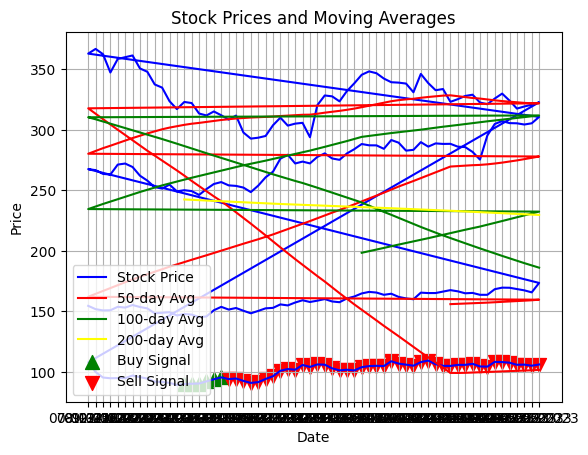

In [64]:

df['50_Avg'] = df['Close'].rolling(window=50).mean()
df['100_Avg'] = df['Close'].rolling(window=100).mean()
df['200_Avg'] = df['Close'].rolling(window=200).mean()
plt.plot(df['Date'], df['Close'], label='Stock Price', color='blue')
plt.plot(df['Date'], df['50_Avg'], label='50-day Avg', color='red')
plt.plot(df['Date'], df['100_Avg'], label='100-day Avg', color='green')
plt.plot(df['Date'], df['200_Avg'], label='200-day Avg', color='yellow')
buy_signals = df[df['50_Avg']  > df['200_Avg']]
sell_signals = df[df['50_Avg']  < df['200_Avg']]
plt.scatter(buy_signals['Date'], buy_signals['Close'], marker='^', color='green', label='Buy Signal', s=100)
plt.scatter(sell_signals['Date'], sell_signals['Close'], marker='v', color='red', label='Sell Signal', s=100)
plt.title('Stock Prices and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()



In [65]:
df.loc[df['Ticker'] == ticker, 'Daily_Return'] = df.loc[df['Ticker'] == ticker, 'Close'].pct_change() * 100
for ticker in selected_tickers:
    daily_returns = df.loc[df['Ticker'] == ticker, 'Daily_Return']
    annualized_return = ((daily_returns.mean() + 1) ** 252 - 1) * 100
    print(f'Annualized Return for {ticker}: {annualized_return:.2f}%')
for ticker in selected_tickers:
    std_dev = df.loc[df['Ticker'] == ticker, 'Daily_Return'].std()
    print(f'Standard Deviation of Daily Returns for {ticker}: {std_dev:.2f}%')

Annualized Return for AAPL: nan%
Annualized Return for MSFT: nan%
Annualized Return for NFLX: -100.00%
Standard Deviation of Daily Returns for AAPL: nan%
Standard Deviation of Daily Returns for MSFT: nan%
Standard Deviation of Daily Returns for NFLX: 2.25%


In [66]:
data = {'Date': ['2023-01-01', '2023-01-02', '2023-01-03'],
        'AAPL Close': [150.0, 152.0, 155.0]}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df['AAPL Returns'] = (df['AAPL Close'] - df['AAPL Close'].shift(1)) / df['AAPL Close'].shift(1) * 100



print(df)


        Date  AAPL Close  AAPL Returns
0 2023-01-01       150.0           NaN
1 2023-01-02       152.0      1.333333
2 2023-01-03       155.0      1.973684


In [67]:
data = {'Date': ['2023-01-01', '2023-01-02', '2023-01-03'],
        'NFLX Close': [150.0, 152.0, 155.0]}
df = pd.DataFrame(data)
df['NFLX Returns'] = (df['NFLX Close'] - df['NFLX Close'].shift(1)) / df['NFLX Close'].shift(1) * 100

print(df)


         Date  NFLX Close  NFLX Returns
0  2023-01-01       150.0           NaN
1  2023-01-02       152.0      1.333333
2  2023-01-03       155.0      1.973684


In [68]:
data = {'Date': ['2023-01-01', '2023-01-02', '2023-01-03'],
        'MSFT Close': [150.0, 152.0, 155.0]}
df = pd.DataFrame(data)
df['MSFT Returns'] = (df['MSFT Close'] - df['MSFT Close'].shift(1)) / df['MSFT Close'].shift(1) * 100
print(df)


         Date  MSFT Close  MSFT Returns
0  2023-01-01       150.0           NaN
1  2023-01-02       152.0      1.333333
2  2023-01-03       155.0      1.973684
